<a href="https://colab.research.google.com/github/bethinaveen23/GEN-AI-2025/blob/main/GenAI-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project
#GenAI-Powered Business Analyst

In [ ]:
import pandas as pd

# Load the datasets
sales_data = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')
stock_data = pd.read_csv('/content/symbols_valid_meta.csv')
hr_data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display basic info and previews
sales_info = sales_data.info()
stock_info = stock_data.info()
hr_info = hr_data.info()

sales_preview = sales_data.head()
stock_preview = stock_data.head()
hr_preview = hr_data.head()

sales_summary = sales_data.describe(include='all')
stock_summary = stock_data.describe(include='all')
hr_summary = hr_data.describe(include='all')

(sales_info, sales_preview, sales_summary,
 stock_info, stock_preview, stock_summary,
 hr_info, hr_preview, hr_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


(None,
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
 0        10107               30      95.70                2  2871.00   
 1        10121               34      81.35                5  2765.90   
 2        10134               41      94.74                2  3884.34   
 3        10145               45      83.26                6  3746.70   
 4        10159               49     100.00               14  5205.27   
 
          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
 0   2/24/2003 0:00  Shipped       1         2     2003  ...   
 1    5/7/2003 0:00  Shipped       2         5     2003  ...   
 2    7/1/2003 0:00  Shipped       3         7     2003  ...   
 3   8/25/2003 0:00  Shipped       3         8     2003  ...   
 4  10/10/2003 0:00  Shipped       4        10     2003  ...   
 
                     ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
 0        897 Long Airport Avenue           NaN            NYC    NY   
 1             59 rue d

##Activation Function

**1. Tanh Activation Function**

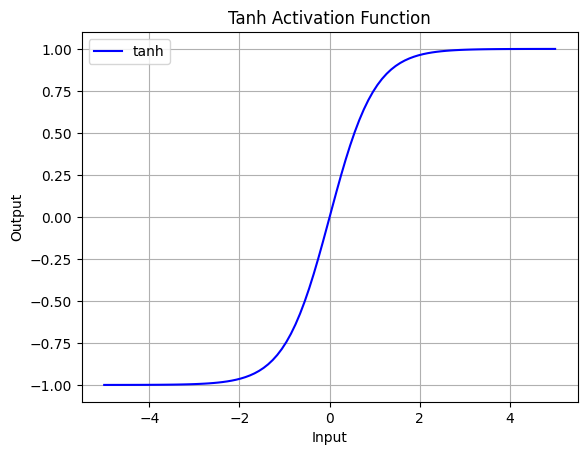

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = tf.keras.activations.tanh(x)

plt.plot(x, y, label='tanh', color='blue')
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


**2. ReLU Activation Function**

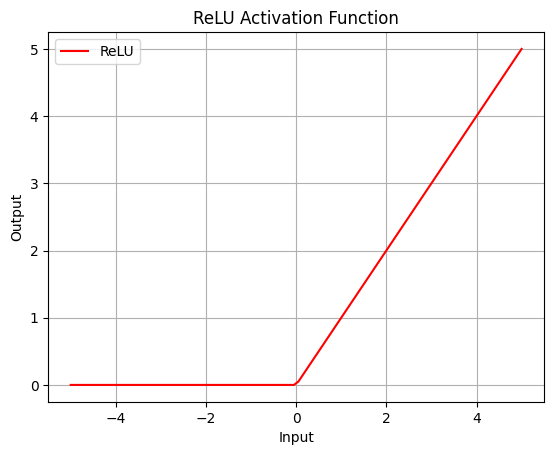

In [ ]:
x = np.linspace(-5, 5, 100)
y = tf.keras.activations.relu(x)

plt.plot(x, y, label='ReLU', color='red')
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


**3. Sigmoid Activation Function**

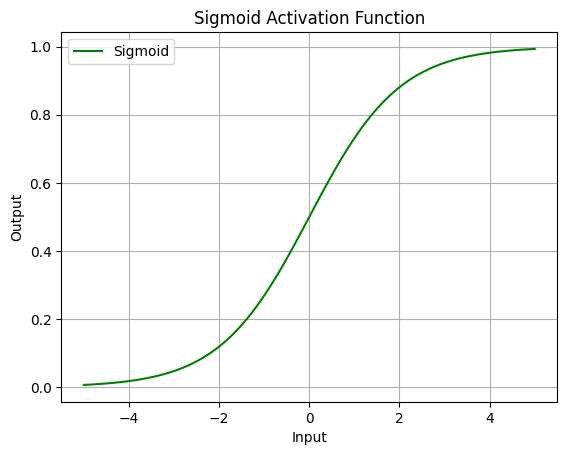

In [ ]:
x = np.linspace(-5, 5, 100)
y = tf.keras.activations.sigmoid(x)

plt.plot(x, y, label='Sigmoid', color='green')
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


**4. Swish Activation Function**

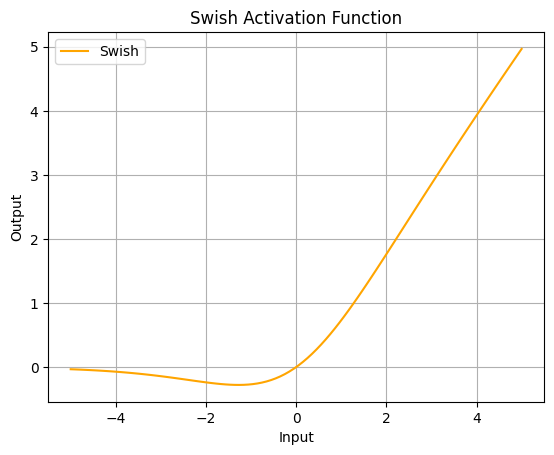

In [ ]:
x = np.linspace(-5, 5, 100)
y = tf.keras.activations.swish(x)

plt.plot(x, y, label='Swish', color='orange')
plt.title("Swish Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


 # Apply These Activations in a Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load the HR dataset
hr_data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encode target variable
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

# Drop non-numeric or identifier columns that are not useful
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
hr_data.drop(columns=drop_cols, inplace=True)

# Convert categorical variables using one-hot encoding
hr_data_encoded = pd.get_dummies(hr_data)

# Split into features and labels
X = hr_data_encoded.drop('Attrition', axis=1)
y = hr_data_encoded['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output shape check
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1176, 51), (294, 51), (1176,), (294,))

**training a dense neural network using different activation functions**



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Function to build, train, and evaluate model with a given activation function
def train_with_activation(activation_name):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation=activation_name),
        Dense(32, activation=activation_name),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    report = classification_report(y_test, y_pred, output_dict=True)

    return {
        "activation": activation_name,
        "test_accuracy": test_accuracy,
        "classification_report": report
    }

# Run with ReLU activation
relu_results = train_with_activation('relu')
relu_results


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


{'activation': 'relu',
 'test_accuracy': 0.8639456033706665,
 'classification_report': {'0': {'precision': 0.8966789667896679,
   'recall': 0.9529411764705882,
   'f1-score': 0.9239543726235742,
   'support': 255.0},
  '1': {'precision': 0.4782608695652174,
   'recall': 0.28205128205128205,
   'f1-score': 0.3548387096774194,
   'support': 39.0},
  'accuracy': 0.8639455782312925,
  'macro avg': {'precision': 0.6874699181774426,
   'recall': 0.6174962292609352,
   'f1-score': 0.6393965411504967,
   'support': 294.0},
  'weighted avg': {'precision': 0.8411745253211182,
   'recall': 0.8639455782312925,
   'f1-score': 0.8484594377429618,
   'support': 294.0}}}

**Train with ReLU Activation**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Reuse your X_train, X_test, y_train, y_test from earlier preprocessing

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8147 - loss: 0.5153 - val_accuracy: 0.7966 - val_loss: 0.4774
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8375 - loss: 0.3818 - val_accuracy: 0.8051 - val_loss: 0.4306
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8755 - loss: 0.3278 - val_accuracy: 0.8347 - val_loss: 0.4072
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8753 - loss: 0.3151 - val_accuracy: 0.8220 - val_loss: 0.4059
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8939 - loss: 0.2811 - val_accuracy: 0.8220 - val_loss: 0.3978
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9043 - loss: 0.2660 - val_accuracy: 0.8220 - val_loss: 0.4027
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9073 - loss: 0.2408 - val_accuracy: 0.8178 - val_loss: 0.4043
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9200 - loss: 0.2008 - val_accuracy: 0.8220 - val_loss: 0.4159
Ep

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = hr_data_encoded.drop('Attrition', axis=1)
y = hr_data_encoded['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**1. ReLU Activation**

In [ ]:
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_relu.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate
y_pred_relu = (model_relu.predict(X_test) > 0.5).astype("int32")
print("ReLU:\n", classification_report(y_test, y_pred_relu))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8379 - loss: 0.4927 - val_accuracy: 0.7966 - val_loss: 0.4647
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8380 - loss: 0.3844 - val_accuracy: 0.8051 - val_loss: 0.4273
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8449 - loss: 0.3240 - val_accuracy: 0.8178 - val_loss: 0.4109
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8634 - loss: 0.2989 - val_accuracy: 0.8220 - val_loss: 0.4071
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8874 - loss: 0.2737 - val_accuracy: 0.8347 - val_loss: 0.4041
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9054 - loss: 0.2454 - val_accuracy: 0.8432 - val_loss: 0.4048
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9135 - loss: 0.2329 - val_accuracy: 0.8432 - val_loss: 0.4132
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9179 - loss: 0.2099 - val_accuracy: 0.8347 - val_loss: 0.4179
Ep

**2. Tanh Activation**

In [ ]:
model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tanh.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tanh.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

y_pred_tanh = (model_tanh.predict(X_test) > 0.5).astype("int32")
print("Tanh:\n", classification_report(y_test, y_pred_tanh))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5757 - loss: 0.6950 - val_accuracy: 0.7076 - val_loss: 0.5586
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7844 - loss: 0.4887 - val_accuracy: 0.8178 - val_loss: 0.4687
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8565 - loss: 0.3691 - val_accuracy: 0.8220 - val_loss: 0.4144
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8706 - loss: 0.3337 - val_accuracy: 0.8220 - val_loss: 0.3906
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8973 - loss: 0.2712 - val_accuracy: 0.8220 - val_loss: 0.3863
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9100 - loss: 0.2464 - val_accuracy: 0.8220 - val_loss: 0.3761
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8884 - loss: 0.2619 - val_accuracy: 0.8390 - val_loss: 0.3771
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9222 - loss: 0.2388 - val_accuracy: 0.8178 - val_loss: 0.3899
Ep

 **3. Sigmoid Activation**

In [ ]:
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_sigmoid.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

y_pred_sigmoid = (model_sigmoid.predict(X_test) > 0.5).astype("int32")
print("Sigmoid:\n", classification_report(y_test, y_pred_sigmoid))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6648 - loss: 0.6036 - val_accuracy: 0.7966 - val_loss: 0.4982
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8391 - loss: 0.4235 - val_accuracy: 0.7966 - val_loss: 0.4874
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8462 - loss: 0.3985 - val_accuracy: 0.7966 - val_loss: 0.4656
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8329 - loss: 0.4110 - val_accuracy: 0.7966 - val_loss: 0.4523
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 0.3753 - val_accuracy: 0.7966 - val_loss: 0.4354
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8478 - loss: 0.3597 - val_accuracy: 0.8008 - val_loss: 0.4187
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8476 - loss: 0.3381 - val_accuracy: 0.8136 - val_loss: 0.4050
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.3186 - val_accuracy: 0.8347 - val_loss: 0.3944
Ep

 **4. Swish Activation (Custom Activation)**

In [ ]:
from tensorflow.keras.activations import swish

model_swish = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=swish, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation=swish),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_swish.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_swish.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

y_pred_swish = (model_swish.predict(X_test) > 0.5).astype("int32")
print("Swish:\n", classification_report(y_test, y_pred_swish))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6530 - loss: 0.6350 - val_accuracy: 0.8051 - val_loss: 0.4875
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8524 - loss: 0.4121 - val_accuracy: 0.8305 - val_loss: 0.4270
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.3766 - val_accuracy: 0.8432 - val_loss: 0.4024
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8692 - loss: 0.3291 - val_accuracy: 0.8517 - val_loss: 0.3932
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8760 - loss: 0.3100 - val_accuracy: 0.8602 - val_loss: 0.3882
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9054 - loss: 0.2617 - val_accuracy: 0.8475 - val_loss: 0.3928
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.2399 - val_accuracy: 0.8432 - val_loss: 0.3931
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8895 - loss: 0.2770 - val_accuracy: 0.8475 - val_loss: 0.4029
Ep

#Using Activations with CNN & Kernel Sizes

In [ ]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.activations import swish

def build_cnn_model(kernel_size, activation):
    model = Sequential([
        Conv1D(filters=32, kernel_size=kernel_size, activation=activation, input_shape=(X_train.shape[1], 1)),
        Flatten(),
        Dense(64, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


**ReLU with Kernel Size 3**

In [ ]:
model_cnn_relu_k3 = build_cnn_model(kernel_size=3, activation='relu')
model_cnn_relu_k3.fit(X_train_cnn, y_train, epochs=20, validation_split=0.2, batch_size=32, verbose=1)

y_pred_cnn_relu_k3 = (model_cnn_relu_k3.predict(X_test_cnn) > 0.5).astype("int32")
print("CNN (ReLU, Kernel=3):\n", classification_report(y_test, y_pred_cnn_relu_k3))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8516 - loss: 0.4825 - val_accuracy: 0.7966 - val_loss: 0.4459
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8551 - loss: 0.3252 - val_accuracy: 0.8305 - val_loss: 0.4144
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8650 - loss: 0.3242 - val_accuracy: 0.8263 - val_loss: 0.4315
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9028 - loss: 0.2386 - val_accuracy: 0.8390 - val_loss: 0.3755
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8787 - loss: 0.2800 - val_accuracy: 0.8517 - val_loss: 0.3718
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8842 - loss: 0.2783 - val_accuracy: 0.8305 - val_loss: 0.4282
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8817 - loss: 0.2614 - val_accuracy: 0.8475 - val_loss: 0.3761
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9116 - loss: 0.2357 - val_accuracy: 0.8517 - val_

Now we are repeating this for:

1.tanh + kernel 5

2.swish + kernel 7

3.sigmoid + kernel 3


In [ ]:
from sklearn.metrics import classification_report

# Store results
cnn_results = []

# Activations and Kernel Sizes to try
activations = {
    'relu': 'relu',
    'tanh': 'tanh',
    'sigmoid': 'sigmoid',
    'swish': swish
}
kernel_sizes = [3, 5, 7]

# Reshape the data for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Run models
for act_name, act_func in activations.items():
    for kernel in kernel_sizes:
        model = Sequential([
            Conv1D(filters=32, kernel_size=kernel, activation=act_func, input_shape=(X_train.shape[1], 1)),
            Flatten(),
            Dense(64, activation=act_func),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_cnn, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=0)

        y_pred = (model.predict(X_test_cnn) > 0.5).astype("int32")
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = report['accuracy']

        cnn_results.append({
            "activation": act_name,
            "kernel_size": kernel,
            "accuracy": accuracy,
            "precision": report['1']['precision'],
            "recall": report['1']['recall'],
            "f1-score": report['1']['f1-score']
        })

cnn_results


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[{'activation': 'relu',
  'kernel_size': 3,
  'accuracy': 0.8639455782312925,
  'precision': 0.4838709677419355,
  'recall': 0.38461538461538464,
  'f1-score': 0.42857142857142855},
 {'activation': 'relu',
  'kernel_size': 5,
  'accuracy': 0.8673469387755102,
  'precision': 0.5,
  'recall': 0.28205128205128205,
  'f1-score': 0.36065573770491804},
 {'activation': 'relu',
  'kernel_size': 7,
  'accuracy': 0.8707482993197279,
  'precision': 0.5294117647058824,
  'recall': 0.23076923076923078,
  'f1-score': 0.32142857142857145},
 {'activation': 'tanh',
  'kernel_size': 3,
  'accuracy': 0.8741496598639455,
  'precision': 0.53125,
  'recall': 0.4358974358974359,
  'f1-score': 0.4788732394366197},
 {'activation': 'tanh',
  'kernel_size': 5,
  'accuracy': 0.8775510204081632,
  'precision': 0.5428571428571428,
  'recall': 0.48717948717948717,
  'f1-score': 0.5135135135135135},
 {'activation': 'tanh',
  'kernel_size': 7,
  'accuracy': 0.8707482993197279,
  'precision': 0.5161290322580645,
  'rec

**All Activations with Kernel Sizes**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.activations import swish
from sklearn.metrics import classification_report

# Reshape input for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Setup
activations = {
    'relu': 'relu',
    'tanh': 'tanh',
    'sigmoid': 'sigmoid',
    'swish': swish
}
kernel_sizes = [3, 5, 7]
results = []

# Loop through each activation + kernel
for act_name, act_func in activations.items():
    for k in kernel_sizes:
        model = Sequential([
            Conv1D(filters=32, kernel_size=k, activation=act_func, input_shape=(X_train.shape[1], 1)),
            Flatten(),
            Dense(64, activation=act_func),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_cnn, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=0)

        y_pred = (model.predict(X_test_cnn) > 0.5).astype("int32")
        report = classification_report(y_test, y_pred, output_dict=True)

        results.append({
            "activation": act_name,
            "kernel_size": k,
            "accuracy": report["accuracy"],
            "precision": report["1"]["precision"],
            "recall": report["1"]["recall"],
            "f1-score": report["1"]["f1-score"]
        })

# Display results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
   activation  kernel_size  accuracy  precision    recall  f1-score
5        tanh            7  0.887755   0.607143  0.435897  0.507463
3        tanh            3  0.880952   0.562500  0.461538  0.507042
8     sigmoid            7  0.880952   0.666667  0.205128  0.313725
1        relu            5  0.877551   0.551724  0.410256  0.470588
9       swish            3  0.874150   0.533333  0.410256  0.463768
4        tanh            5  0.874150   0.535714  0.384615  0.447761
11      swish            7  0.870748   0.521739  0.307692  0.387097
6     sigmoid            3  0.867347   0.000000  0.000000  0.000000
7     sigmoid            5  0.867347   0.000000  0.000000  0.000000
10      swish            5  0.867347   0.500000  0.384615  0.434783
0        relu            3  0.860544   0.475000  0.487179  0.481013
2        relu            7  0.853741   0.423077  0.282051  0.338462


###Plot Performance Comparison

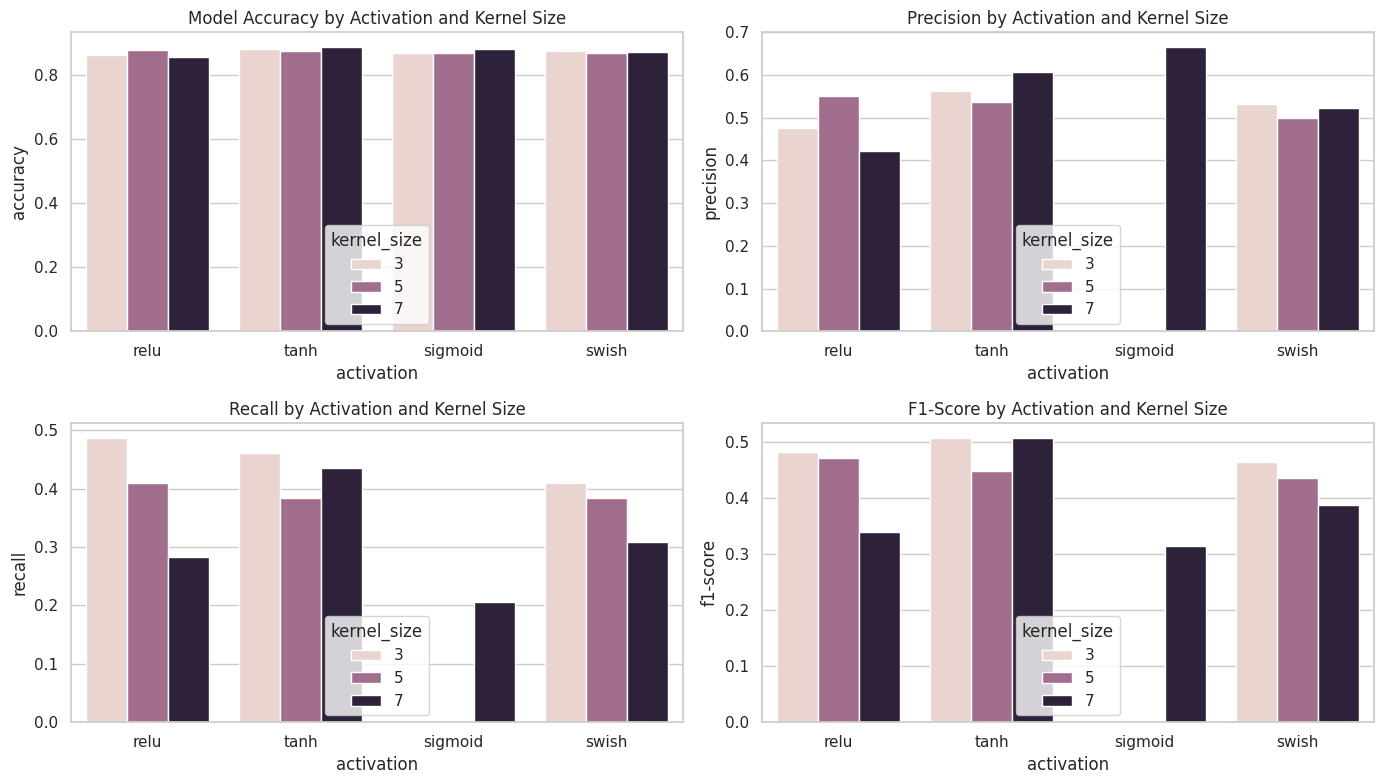

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the same results_df from previous code block
# Example: results_df = pd.DataFrame(results)

# Set seaborn theme
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x='activation', y='accuracy', hue='kernel_size')
plt.title('Model Accuracy by Activation and Kernel Size')

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x='activation', y='precision', hue='kernel_size')
plt.title('Precision by Activation and Kernel Size')

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x='activation', y='recall', hue='kernel_size')
plt.title('Recall by Activation and Kernel Size')

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x='activation', y='f1-score', hue='kernel_size')
plt.title('F1-Score by Activation and Kernel Size')

plt.tight_layout()
plt.show()
